# HarderLASSO: An Advanced Feature Selection Framework

This notebook provides examples of how to use the HarderLASSO framework for feature selection across different machine learning tasks. HarderLASSO combines a LASSO-style regularization with an optimal regularization parameter for effective feature selection.

## Table of Contents
1. [Regression](#regression)
   - [Linear Regression](#linear-regression)
   - [Non-Linear Regression](#non-linear-regression)
2. [Classification](#classification)
   - [Binary Classification](#binary-classification)
   - [Multi-class Classification](#multi-class-classification)
3. [Survival Analysis](#survival-analysis)
4. [Advanced Usage](#advanced-usage)
   - [Model Saving and Loading](#model-saving-loading)


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer

## Regression <a name="regression"></a>
HarderLASSO can handle both linear and non-linear regression tasks while performing feature selection.

In [9]:
from models import HarderLASSORegressor

### Linear Regression <a name="linear-regression"></a>

For linear regression tasks, you can use `HarderLASSORegressor` with `hidden_dims=None` to create a model without hidden layers (equivalent to a linear model).

In [16]:
n_samples, n_features = 150, 300
X = np.random.normal(size=(n_samples, n_features))

# Only the first 10 features are relevant
s = 10
relevant_features = np.arange(s)
beta = 3 * np.ones(s)
y = X[:, relevant_features] @ beta + np.random.normal(size=(X.shape[0],))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit a HarderLASSORegressor for linear regression
linear_model = HarderLASSORegressor(
    nu=0.1,           # Indicates the use of a non-convex penalty, use nu=1 for classic l1 LASSO
    hidden_dims=None, # No hidden layers makes this a linear model
    lambda_qut=None   # Let the model determine lambda automatically
)

linear_model.fit(X_train, y_train, verbose=False)

# Evaluate the model
print("Selected features:", linear_model.selected_features_idx_)
print("Number of selected features:", len(linear_model.selected_features_idx_))
print("Performance metrics on test set:", linear_model.score(X_test, y_test))

Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of selected features: 10
Performance metrics on test set: {'MSE': 1.0392852, 'MAE': 0.85451865, 'R2': 0.9896943606436253}


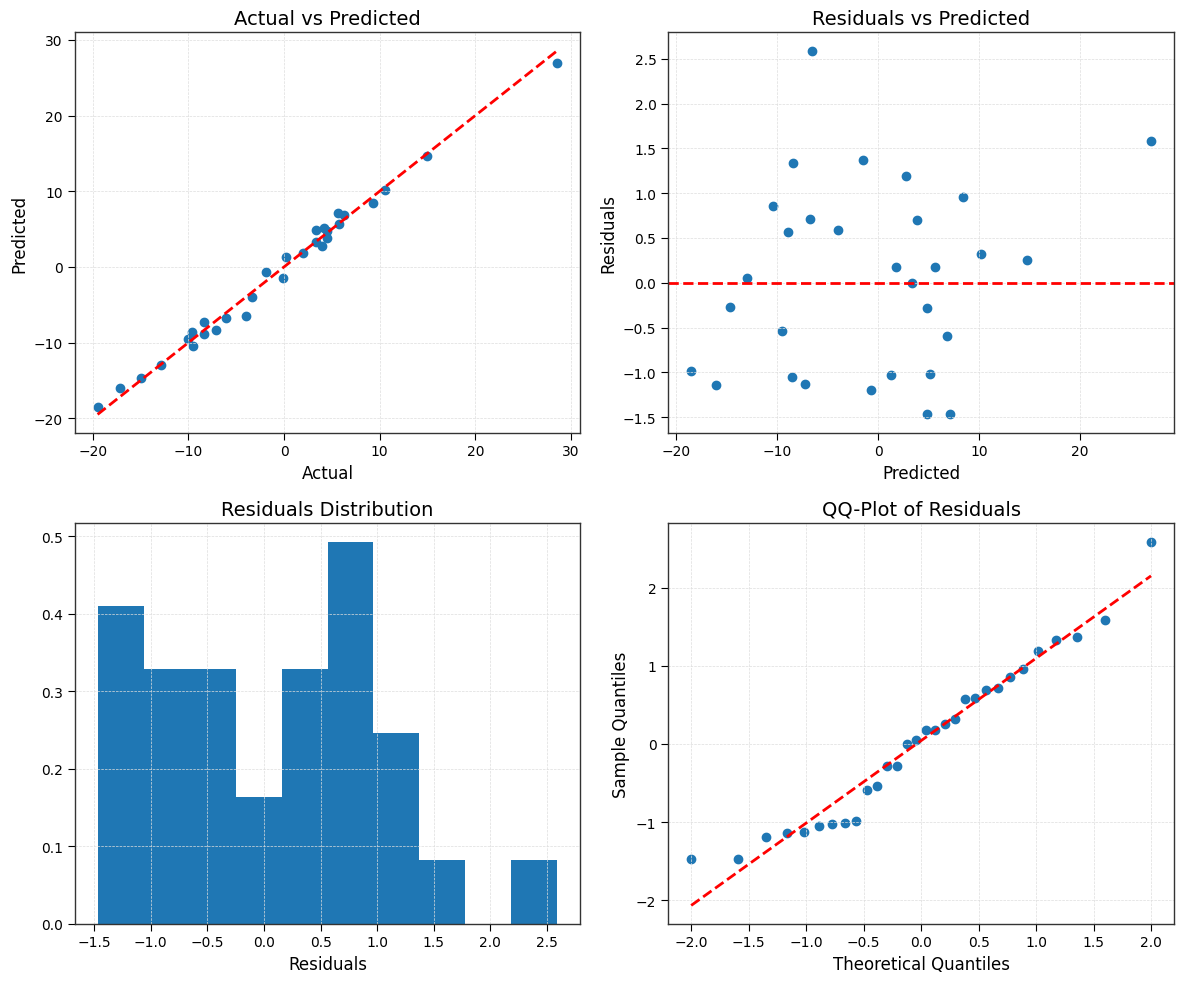

In [17]:
# Visualize true vs predicted values
linear_model.plot_diagnostics(X_test, y_test)

### Non-Linear Regression <a name="non-linear-regression"></a>

For non-linear regression tasks, you can specify hidden layers with the `hidden_dims` parameter.

In [ ]:
n_samples, n_features = 500, 50
X = np.random.normal(size=(n_samples, n_features))

# Create a non-linear relationship with only a few features
s = 6
y = np.zeros(shape=(X.shape[0], ))
for i in range(0, s, 2):
    y += 10 * np.abs(X[:, i] - X[:, i+1])

y += np.random.normal(size=(X.shape[0], ))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a HarderLASSORegressor with hidden layers for non-linear regression
nonlinear_model = HarderLASSORegressor(
    nu=0.1,
    hidden_dims=(20,),  # One hidden layer with 20 neurons
    lambda_qut=None
)

nonlinear_model.fit(X_train, y_train, verbose=False)

# Evaluate the non-linear model
print("Selected features:", nonlinear_model.selected_features_idx_)
print("Number of selected features:", len(nonlinear_model.selected_features_idx_))
print("Performance metrics:", nonlinear_model.score(X_test, y_test))

Selected features: [0, 1, 2, 3, 4, 5]
Number of selected features: 6
Performance metrics: {'MSE': 1.5092163, 'MAE': 0.94890296, 'R2': 0.993426586035639}


## Classification <a name="classification"></a>
HarderLASSO supports both binary and multi-class classification tasks.

In [21]:
from models import HarderLASSOClassifier

### Binary Classification <a name="binary-classification"></a>

For binary classification, we'll use the breast cancer dataset which is a common benchmark.

In [ ]:
# Load breast cancer dataset (binary classification)
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset shape: (569, 30)
Number of classes: 2


In [30]:
# Create and fit a HarderLASSOClassifier for binary classification
# Linear model (no hidden layers)
binary_classifier = HarderLASSOClassifier(
    nu=0.1,
    hidden_dims=None,  # Linear model
    lambda_qut=None
)

binary_classifier.fit(X_train, y_train, verbose=False)

# Evaluate the binary classifier
print("Selected features:", binary_classifier.selected_features_)
print(f"Number of selected features: {len(binary_classifier.selected_features_idx_)}/{len(X_train[1])}")
print("Performance metrics:", binary_classifier.score(X_test, y_test))

Selected features: ['7', '20']
Number of selected features: 2/30
Performance metrics: {'accuracy': 0.9649122807017544}


### Multi-class Classification <a name="multi-class-classification"></a>

For multi-class classification, we'll use the Iris dataset.

In [31]:
# Load iris dataset (multi-class classification)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset shape: (150, 4)
Number of classes: 3


In [ ]:
# Create and fit a HarderLASSOClassifier for multi-class classification
# Using a neural network with one hidden layer
multiclass_classifier = HarderLASSOClassifier(
    nu=0.1,
    hidden_dims=None,
    lambda_qut=None
)

multiclass_classifier.fit(X_train, y_train, verbose=False)

print("Selected features:", multiclass_classifier.selected_features_)
print(f"Number of selected features: {len(multiclass_classifier.selected_features_idx_)}/{len(X_train[1])}")
print("Performance metrics:", multiclass_classifier.score(X_test, y_test))

Selected features: ['2', '3']
Number of selected features: 2/4
Performance metrics: {'accuracy': 0.9666666666666667}


## Survival Analysis <a name="survival-analysis"></a>

HarderLASSO can also be used for survival analysis tasks with the `HarderLASSOCox` model.

In [37]:
from models import HarderLASSOCox

In [36]:
# Load Rossi dataset for survival analysis
from lifelines.datasets import load_rossi
rossi = load_rossi()
print(rossi.head())

# Prepare data
X = rossi.drop(columns=['week', 'arrest'])
time = rossi['week']
event = rossi['arrest']

# Split data
X_train, X_test, time_train, time_test, event_train, event_test = train_test_split(
    X, time, event, test_size=0.2, random_state=42
)

   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8
2    25       1    0   19     0     1    0     1    13
3    52       0    1   23     1     1    1     1     1
4    52       0    0   19     0     1    0     1     3


In [ ]:
# Create and fit a HarderLASSOCox model
cox_model = HarderLASSOCox(
    nu=0.1,
    hidden_dims=None,
    lambda_qut=None
)

# Fit the model with time and event data
cox_model.fit(X_train, (time_train, event_train), verbose=False)

# Evaluate the Cox model
print("Selected features:", cox_model.selected_features_)
print(f"Number of selected features: {len(cox_model.selected_features_idx_)}/{X_train.shape[1]}")
print("Performance metrics:", cox_model.score(X_test, (time_test, event_test)))

Selected features: ['prio']
Number of selected features: 1/7
Performance metrics: {'C-index': 0.6421080230728894, 'neg_partial_log_likelihood': 110.40426110612646}


## Advanced Usage <a name="advanced-usage"></a>
In this section, we'll cover some advanced usage patterns for HarderLASSO.

### Model Saving and Loading <a name="model-saving-loading"></a>

HarderLASSO models can be saved and loaded, which is useful for production environments or sharing models.

In [44]:
# Save the trained binary classifier model
linear_model.save('linear_model.pt')

# Load the saved model
loaded_model = HarderLASSORegressor.load('linear_model.pt')

# Verify that the loaded model performs the same
print("Original model features:", linear_model.selected_features_idx_)
print("Loaded model features:", loaded_model.selected_features_idx_)

Original model features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Loaded model features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/Users/maxvancutsem/Desktop/harderLASSO-github/models/base/HarderLASSOModel.py:237: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state = torch.load(path)
